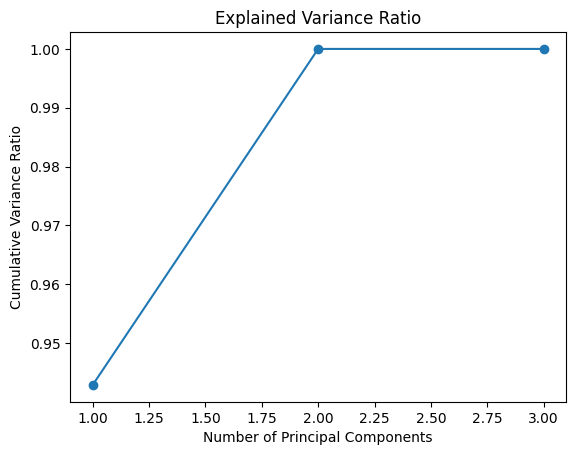

Training Set with Principal Components:
        PC1       PC2           PC3  Stress Level
0  1.791353 -0.258142  6.075376e-15           1.0
1 -2.254379  0.248009  7.345649e-16           1.0
2 -2.170420 -0.502862 -1.434144e-16           2.0
3  2.632204  0.349284  8.056231e-16           2.0
4 -2.173049  0.157840 -8.669013e-17           0.0

Testing Set with Principal Components:
        PC1       PC2           PC3  Stress Level
0 -2.019379 -0.670318 -8.317370e-16           NaN
1  0.491084  0.005200 -4.443594e-16           NaN
2 -1.096469 -0.049057  4.511226e-16           NaN
3 -1.153247 -0.315002 -8.384703e-16           NaN
4 -1.926431 -0.773367  8.884991e-16           NaN


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/Stress-Lysis.csv")

# Separate features from the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using the training set
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA using the training set
pca = PCA()
pca_result_train = pca.fit_transform(X_train_standardized)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

# Choose the number of components based on the plot or a desired threshold
# For example, let's say you want to keep 95% of the variance
n_components = (cumulative_variance_ratio >= 0.95).sum() + 1

# Apply PCA with the chosen number of components to both training and testing sets
pca = PCA(n_components=n_components)
pca_result_train = pca.fit_transform(X_train_standardized)
pca_result_test = pca.transform(X_test_standardized)

# Create DataFrames with the principal components
columns = [f"PC{i}" for i in range(1, n_components + 1)]
pca_df_train = pd.DataFrame(data=pca_result_train, columns=columns)
pca_df_test = pd.DataFrame(data=pca_result_test, columns=columns)

# Concatenate the principal components with the target variable for both sets
pca_df_train_with_target = pd.concat([pca_df_train, y_train], axis=1)
pca_df_test_with_target = pd.concat([pca_df_test, y_test], axis=1)

# Display the resulting DataFrames
print("Training Set with Principal Components:")
print(pca_df_train_with_target.head())

print("\nTesting Set with Principal Components:")
print(pca_df_test_with_target.head())
